# Working notebook for ALAN project as of November 14, 2023

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px

### Import FAA Bird Strike Database. Provide descriptive statistics

In [81]:
df = pd.read_csv('/Users/joeypaulelihaynes/ALAN/MSAccess/NWSD/STRIKE_REPORTS.csv', low_memory=False)

# Print the first 25 rows.
df.head(25)

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,...,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608242,6/22/1996 0:00:00,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,...,Medium,NaN,NaN,/Legacy Record=100001/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007 0:00:00,0
1,608243,6/26/1996 0:00:00,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,...,Medium,NaN,NaN,/Legacy Record=100002/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007 0:00:00,0
2,608244,7/1/1996 0:00:00,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.30252,-95.89417,...,Medium,NaN,NaN,/Legacy Record=100003/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007 0:00:00,0
3,608245,7/1/1996 0:00:00,7,1996,NaN,NaN,KIAD,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,...,Medium,NaN,NaN,/Legacy Record=100004/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007 0:00:00,0
4,608246,7/1/1996 0:00:00,7,1996,NaN,NaN,KLGA,LA GUARDIA ARPT,40.77724,-73.87261,...,Medium,NaN,NaN,/Legacy Record=100005/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007 0:00:00,0
5,608247,5/6/1991 0:00:00,5,1991,NaN,Day,KSAT,SAN ANTONIO INTL,29.53369,-98.46978,...,Medium,NaN,NaN,SOURCE = FAA FROM 3830 /Legacy Record=100006/,REDACTED,REDACTED,Other,Pilot,11/21/1997 0:00:00,0
6,608248,11/5/1993 0:00:00,11,1993,NaN,Dawn,KMCI,KANSAS CITY INTL,39.29761,-94.71391,...,Medium,NaN,NaN,"THIS MAY BE DUPL STRIKE FOR AIR MIDWEST, BUT T...",REDACTED,REDACTED,FAA Form 5200-7,NaN,5/13/1998 0:00:00,0
7,608249,7/2/1995 0:00:00,7,1995,NaN,NaN,KMCI,KANSAS CITY INTL,39.29761,-94.71391,...,Medium,NaN,NaN,/Legacy Record=100008/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007 0:00:00,0
8,608250,9/19/1990 0:00:00,9,1990,NaN,Day,KDFW,DALLAS/FORT WORTH INTL ARPT,32.89595,-97.03720,...,Small,NaN,NaN,/Legacy Record=100009/,REDACTED,REDACTED,FAA Form 5200-7,Pilot,1/21/1999 0:00:00,0
9,608251,5/3/1992 0:00:00,5,1992,NaN,Day,KSJC,NORMAN Y. MINETA SAN JOSE INTL ARPT,37.36186,-121.92901,...,Small,NaN,NaN,A/C = FAIRCHILD METRO II (5/8/14 UPDATED A/C) ...,REDACTED,REDACTED,FAA Form 5200-7,NaN,5/8/2014 0:00:00,0


In [82]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286528 entries, 0 to 286527
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               286528 non-null  int64  
 1   INCIDENT_DATE          286528 non-null  object 
 2   INCIDENT_MONTH         286528 non-null  int64  
 3   INCIDENT_YEAR          286528 non-null  int64  
 4   TIME                   161507 non-null  object 
 5   TIME_OF_DAY            165248 non-null  object 
 6   AIRPORT_ID             286525 non-null  object 
 7   AIRPORT                286528 non-null  object 
 8   LATITUDE               251248 non-null  float64
 9   LONGITUDE              251247 non-null  float64
 10  RUNWAY                 217089 non-null  object 
 11  STATE                  251248 non-null  object 
 12  FAAREGION              251248 non-null  object 
 13  LOCATION               33736 non-null   object 
 14  ENROUTE_STATE          5022 non-nul

In [83]:
df.describe()

,INDEX_NR,INCIDENT_MONTH,INCIDENT_YEAR,LATITUDE,LONGITUDE,EMA,EMO,AC_MASS,NUM_ENGS,ENG_1_POS,...,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,BIRD_BAND_NUMBER,REMAINS_COLLECTED,REMAINS_SENT,NR_INJURIES,NR_FATALITIES,TRANSFER
count,2.865280e+05,286528.000000,286528.000000,2.512480e+05,251247.000000,190815.000000,185607.000000,205029.000000,204800.000000,204026.000000,...,286528.000000,286528.000000,286528.000000,286528.000000,3.850000e+02,286528.000000,286528.000000,276.000000,24.000000,286528.0
mean,8.677197e+05,7.170612,2011.613905,2.026246e+02,-90.878678,19.779153,8.528051,3.527330,2.014448,2.819082,...,0.004977,0.003406,0.132057,0.008139,8.970923e+07,0.515967,0.158965,1.293478,2.041667,0.0
std,2.465197e+05,2.774460,8.406901,8.210994e+04,328.577698,10.732167,11.734294,0.885284,0.420835,2.113776,...,0.070371,0.058264,0.338553,0.089848,9.112696e+07,0.499746,0.365644,0.756134,1.654484,0.0
min,6.082420e+05,1.000000,1990.000000,-3.767333e+01,-177.381000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.0
25%,6.887068e+05,5.000000,2006.000000,3.303915e+01,-98.568198,10.000000,1.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.0
50%,7.634075e+05,7.000000,2013.000000,3.880581e+01,-87.904460,22.000000,4.000000,4.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,9.281278e+07,1.000000,0.000000,1.000000,1.500000,0.0
75%,1.060862e+06,9.000000,2018.000000,4.085010e+01,-80.417940,31.000000,10.000000,4.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,1.893408e+08,1.000000,0.000000,1.000000,2.000000,0.0
max,1.459351e+06,12.000000,2023.000000,4.115443e+07,164140.000000,92.000000,97.000000,5.000000,4.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,2.821218e+08,1.000000,1.000000,7.000000,8.000000,0.0


### Data Cleaning

In [84]:
df.shape

(286528, 100)

In [85]:
# Check for duplicates
# Diminsions of the database remain the same after dropping duplicates, indicating that none were found
df.drop_duplicates().shape

(286528, 100)

In [86]:
# Convert date to datetime object
df['INCIDENT_DATE'] = pd.to_datetime(df['INCIDENT_DATE'])

### Descriptive statistics / visualizations

In [87]:
# Mean incident year
df['INCIDENT_YEAR'].mean()

2011.6139050982802

In [88]:
# Latest incident year
df['INCIDENT_YEAR'].max()

2023

In [89]:
# Earliest incident year
df['INCIDENT_YEAR'].min()

1990

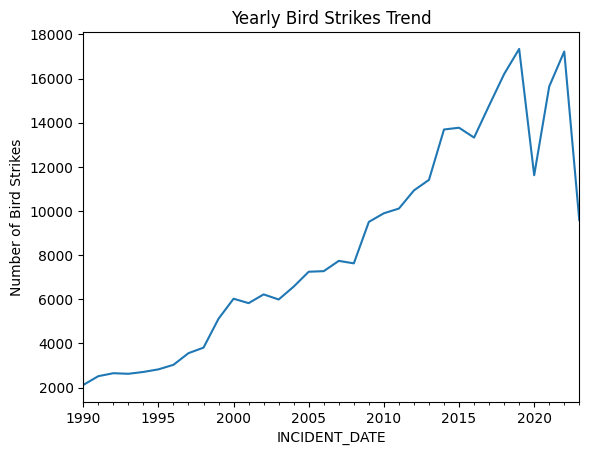

In [90]:
# Trend analysis (yearly bird strikes)
df.set_index('INCIDENT_DATE', inplace=True)
df.resample('Y').size().plot(title='Yearly Bird Strikes Trend')
plt.ylabel('Number of Bird Strikes')
plt.show()

<Axes: title={'center': 'Bird Strikes by Time of Day'}, xlabel='TIME_OF_DAY'>

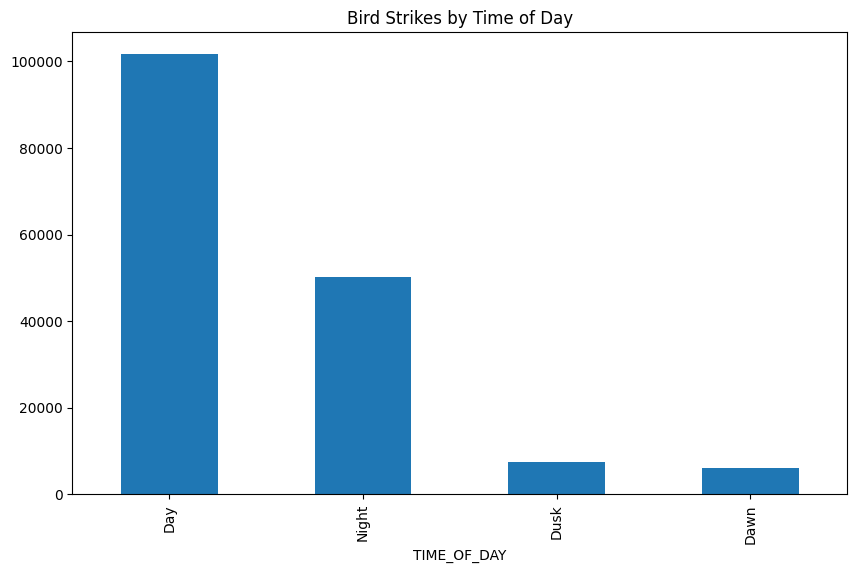

In [24]:
# Common times of day for bird strikes
plt.figure(figsize=(10, 6))
df['TIME_OF_DAY'].value_counts().plot(kind='bar', title='Bird Strikes by Time of Day')

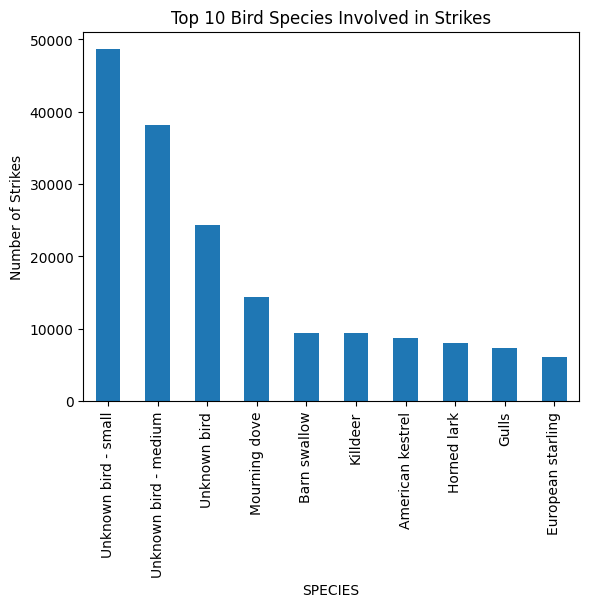

In [25]:
# Species Analysis (Bird Species Involved)
df['SPECIES'].value_counts().head(10).plot(kind='bar', title='Top 10 Bird Species Involved in Strikes')
plt.ylabel('Number of Strikes')
plt.show()

#### Visualize bird strikes by location

In [121]:
# Filter, such that only strikes that are known to have occured at night are selected
# night_df = df[df['TIME_OF_DAY'] == 'Night']

# Group by latitude and longitude, and count the number of strikes
grouped_data = df.groupby(['LATITUDE', 'LONGITUDE']).size().reset_index(name='NUMBER_OF_STRIKES')

# Display the first few rows of the new dataframe
print(grouped_data.head())

    LATITUDE   LONGITUDE  NUMBER_OF_STRIKES
0 -37.673333  144.843333                  1
1 -37.008056  174.791667                  5
2 -34.838417  -56.030806                 12
3 -34.822222  -58.535833                 72
4 -34.559175  -58.415606                  2


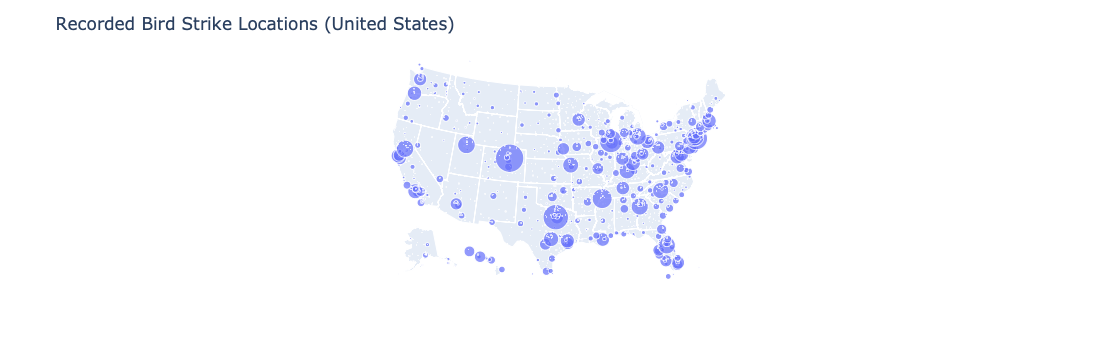

In [124]:
# Plot
fig = px.scatter_geo(grouped_data[grouped_data.NUMBER_OF_STRIKES>=1],  # Input Pandas DataFrame
                    lat="LATITUDE",  # DataFrame column with latitude
                    lon="LONGITUDE",  # DataFrame column with latitude
                    size="NUMBER_OF_STRIKES") # Set to plot size as number of strikes
fig.update_layout(
    title_text = 'Recorded Bird Strike Locations (United States)',
    geo_scope='usa',
)

fig.show()